In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
dirname = "/home/daniela/git/analyzing-corpora/data/data/enron_out_0.1/"

In [3]:

from corpora.scikit import ScikitLda

import os
import zlib
import numpy
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
from scipy import sparse
topics = []
for subdir in [x[0] for x in os.walk(dirname)][1:]:
    for filename in os.listdir(subdir):
        if filename.endswith('pkl'):
            print("attempting... ", filename)
            lda = ScikitLda.load(subdir+"/"+filename)
            for topic in lda.topics:
                topics.append(topic / topic.sum())

('attempting... ', 'lda_87.pkl')
('attempting... ', 'lda_3.pkl')
('attempting... ', 'lda_20.pkl')
('attempting... ', 'lda_100.pkl')
('attempting... ', 'lda_4.pkl')
('attempting... ', 'lda_43.pkl')
('attempting... ', 'lda_63.pkl')
('attempting... ', 'lda_34.pkl')
('attempting... ', 'lda_74.pkl')
('attempting... ', 'lda_7.pkl')
('attempting... ', 'lda_52.pkl')
('attempting... ', 'lda_27.pkl')
('attempting... ', 'lda_15.pkl')


In [4]:
topics

[array([  1.56543402e-09,   1.56543402e-09,   1.56543402e-09, ...,
          1.56543402e-09,   1.56543402e-09,   1.56543402e-09]),
 array([  2.26854583e-07,   2.26854583e-07,   2.26854583e-07, ...,
          2.26854583e-07,   2.26854583e-07,   2.26854583e-07]),
 array([  3.01134467e-08,   3.01134467e-08,   3.01134467e-08, ...,
          3.01134467e-08,   3.01134467e-08,   3.01134467e-08]),
 array([  4.71741237e-08,   4.71741237e-08,   4.71741237e-08, ...,
          4.71741237e-08,   4.71741237e-08,   4.71741237e-08]),
 array([  5.03724032e-09,   5.03724032e-09,   5.03724032e-09, ...,
          5.03724032e-09,   5.03724032e-09,   5.03724032e-09]),
 array([  6.30511418e-09,   6.30511418e-09,   6.30511418e-09, ...,
          6.30511418e-09,   6.30511418e-09,   6.30511418e-09]),
 array([  8.86065597e-08,   8.86065597e-08,   8.86065597e-08, ...,
          8.86065597e-08,   8.86065597e-08,   8.86065597e-08]),
 array([  3.00552207e-08,   3.00552207e-08,   3.00552207e-08, ...,
          3.0055

In [5]:
'''
The first step is convert the similarity matrix into distance matrix(=dist_matrix). 
Note: more similar the item, lesser is their distance.
'''
cos_distance = pairwise_distances(topics, metric='cosine')

In [6]:
cos_distance

array([[  7.73603404e-13,   9.99980031e-01,   9.93270756e-01, ...,
          9.93294338e-01,   9.94183725e-01,   9.21961588e-01],
       [  9.99980031e-01,  -1.40065737e-12,   9.99996223e-01, ...,
          9.98381465e-01,   9.99965391e-01,   9.98948422e-01],
       [  9.93270756e-01,   9.99996223e-01,   7.12796489e-12, ...,
          6.82165117e-01,   9.99851339e-01,   9.22496272e-01],
       ..., 
       [  9.93294338e-01,   9.98381465e-01,   6.82165117e-01, ...,
         -2.27773356e-12,   9.98406192e-01,   8.49138435e-01],
       [  9.94183725e-01,   9.99965391e-01,   9.99851339e-01, ...,
          9.98406192e-01,   4.53770355e-12,   9.99725539e-01],
       [  9.21961588e-01,   9.98948422e-01,   9.22496272e-01, ...,
          8.49138435e-01,   9.99725539e-01,   4.86455320e-12]])

In [7]:
len(topics)  # number of topics

529

In [8]:
from sklearn import manifold

In [153]:
from sklearn.manifold import MDS 
MDS() 
# pick number of components=2 so that we can plot on 2-space., random_state is chosen so that we can re-produce. 
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1) 
pos = mds.fit_transform(cos_distance) # shape (n_components, n_samples) 
xs, ys = pos[:, 0], pos[:, 1]

In [154]:
len(pos) # good

529

In [155]:
import matplotlib.pyplot as plt

In [158]:
from sklearn.cluster import KMeans
k_fit = KMeans(n_clusters=25).fit_predict(cos_distance)

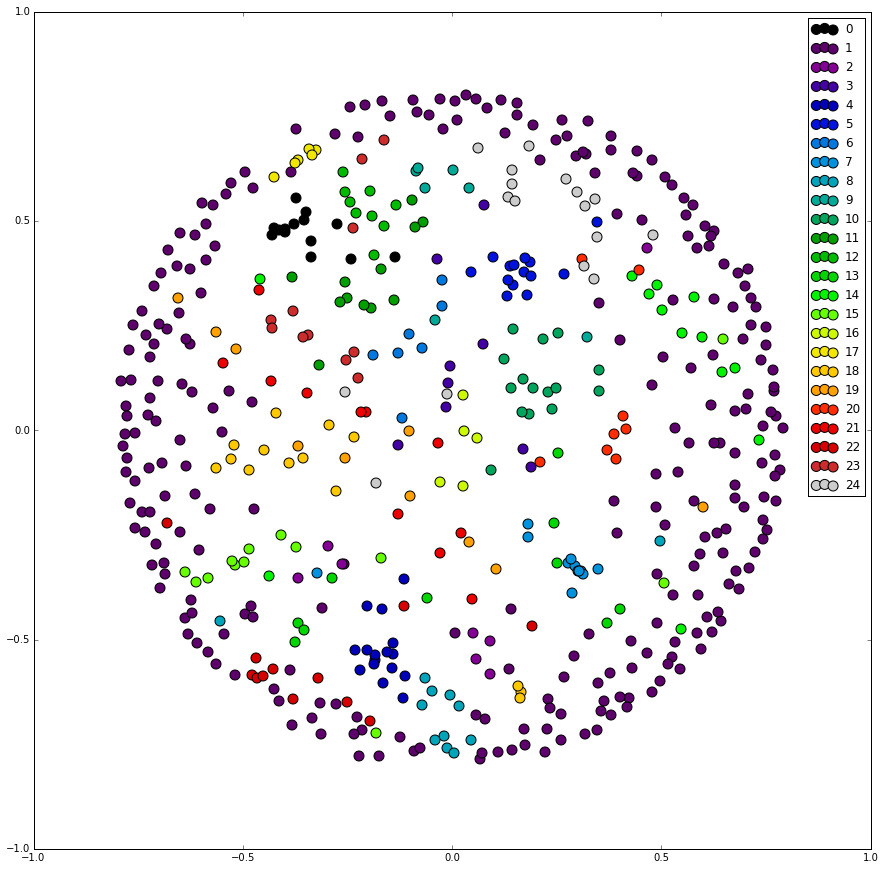

In [159]:
figure(figsize=(15,15))

x = np.arange(10)
yys = [i+x+(i*x)**2 for i in range(25)]
colors = cm.nipy_spectral(np.linspace(0, 1, 25))
#print colors[24]

#plt.scatter(xs,ys, c=k_fit, s=100)
for idx in range(0,25):
    plt.scatter(xs[numpy.where(k_fit==idx)], ys[numpy.where(k_fit==idx)], s=100, label=str(idx), c=colors[idx])
plt.legend()    
#print xs[numpy.where(k_fit==0)]
#colorbar()

In [160]:
import gensim
dic = gensim.corpora.Dictionary.load("/home/daniela/git/analyzing-corpora/data/data/filtered_0.1_5_1000000.dic")

In [161]:
len(dic)

175884

In [162]:
k_fit # which topic belongs to which cluster

array([ 6,  1,  1, 22, 17, 11,  1,  1,  1,  1,  1,  1,  1, 14,  1, 22,  3,
        1,  1,  1,  1,  1,  0, 18, 12,  1,  1, 23,  1,  1, 19,  1,  1,  7,
        1,  1,  5,  8, 15,  1,  1,  1,  1,  1,  1,  1, 11,  1,  1,  1,  3,
        1, 14,  1,  1,  1,  1, 18, 20, 11,  1,  2,  1, 17,  1,  1,  1,  1,
        1,  1,  1, 15,  1, 24, 21,  4,  1,  9,  1, 13,  1,  1,  1, 22,  4,
        1,  1,  0,  6, 16,  5, 10,  1,  2,  9, 19,  0,  5,  4, 16, 13, 15,
       12,  1, 21,  1, 23, 20, 11, 18,  7,  7, 10,  1, 11,  1,  1,  1,  1,
        1, 24,  1,  1,  1,  1, 13,  1,  1,  1,  1,  1,  1, 24,  1,  1, 22,
       12,  1,  1, 11, 14,  1,  1,  6,  5,  1,  1,  1,  8,  1,  1,  1, 23,
        1, 20,  1,  1,  1,  9,  1,  1,  1,  0, 15,  3,  1,  1,  1,  1,  1,
        1,  1,  1, 18, 21,  1, 17, 15,  1, 10,  1,  1,  1,  1,  1,  5, 19,
        1,  3,  1,  1,  1,  1,  1, 22,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        4,  2, 24,  1,  1,  1, 16, 10, 19,  0, 24,  5, 17,  0,  8,  2,  8,
        1,  7,  1,  1,  1

In [164]:
cluster_indices = [ numpy.where(k_fit==n) for n in range(0,25) ]
[n for n in cluster_indices[2][0]]
print cluster_indices[2][0]
topic_out = [topics[n] for n in cluster_indices[2][0]]
print numpy.shape(topic_out)
#print cluster_indices
#print numpy.shape(topics)
#topicsn = [ topics[cluster_indices[0][0][n] for n in range(0,len(cluster_indeces[0][0]))] ]
#print cluster_indices[0][0]
#print numpy.shape(cluster_indices)

[ 61  93 205 219 290 369 415 454]
(8, 175884)


In [165]:
def return_n_words(dic, topic, n_words):
  aa = [(dic[idx],topic[idx]) for idx in argsort(topic)[-n_words:] ]
  return dict(aa)

In [166]:
#topic_weights = []
#topic_weights = [ return_n_words(dic, topics[idx], 10) for idx in range(0,len(topics[0:3])) ]
topic_weights = [ return_n_words(dic, topic_out[idx], 10) for idx in range(0,len(topic_out[:])) ]

#return_n_words(dic, topics[0], 10)
topic_weights

[{u'corp': 0.029396282239410224,
  u'data': 0.070963249071013937,
  u'database': 0.12102536767368466,
  u'e': 0.022901514529524155,
  u'impact': 0.032570995655962838,
  u'l': 0.022339938234614002,
  u'pager': 0.031434213503573012,
  u'r': 0.021655242375139487,
  u'scheduled': 0.081358387099182194,
  u'server': 0.027732703789772734},
 {u'database': 0.086651534813156725,
  u'dbcaps97data': 0.0495916774453991,
  u'error': 0.099881047081678109,
  u'file': 0.016134816113954526,
  u'folder': 0.00798483348816585,
  u'list': 0.015199096841347801,
  u'name': 0.013155845916502434,
  u'occurred': 0.036061913878922387,
  u'report': 0.04314148520599604,
  u'updated': 0.06358728267439169},
 {u'corp': 0.049551298124093639,
  u'data': 0.099351862485823381,
  u'database': 0.12471027786071175,
  u'eb': 0.027242385100275306,
  u'expense': 0.019190916028050824,
  u'operations': 0.020687572118239048,
  u'pager': 0.032391302332358089,
  u'ratings': 0.016933544634148597,
  u'services': 0.019376128501400611,


/home/daniela/anaconda/envs/sherlock-again/lib/python2.7/site-packages/PIL/ImageDraw.py:104: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


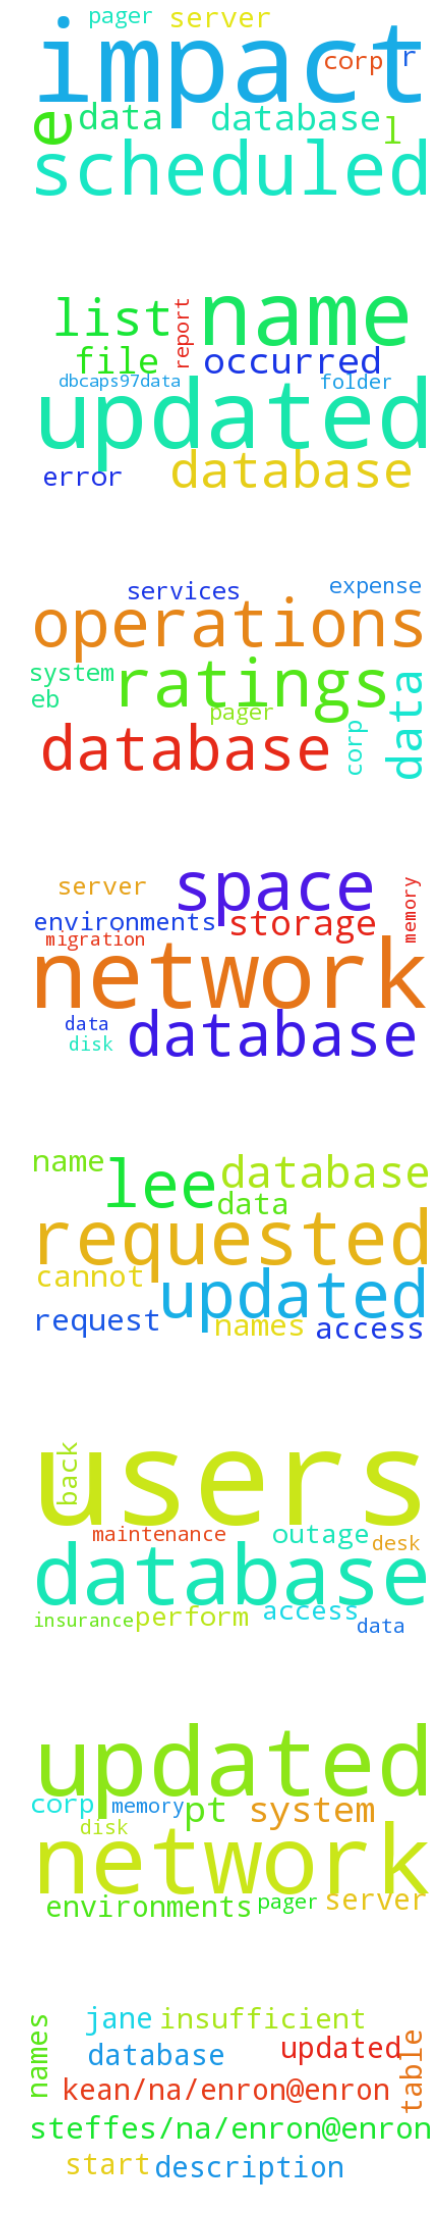

In [168]:
from wordcloud import WordCloud

figure(figsize=(16,40))
for idx,topic in enumerate(topic_weights):
    wc = WordCloud(background_color="white")
    ww = [(word,weight) for word,weight in topic.iteritems()]
    img = wc.generate_from_frequencies(ww)
    subplot(len(topic_weights),2,2*idx+1)
    imshow(img)
    axis('off')
    
#    subplot(nTopics,2,2*idx+2)
#    plot(topicsByAge[:,idx])
#    axis([10, 100, 0, 1.0])
#    title('Topic #%2d'%(idx))

In [137]:
topic_weights

[{u'attempting': 0.0042718758508231685,
  u'contract': 0.0058957541343635737,
  u'contracts': 0.006844541819375544,
  u'cost': 0.0053567797397312137,
  u'due': 0.0052003480577177789,
  u'however': 0.0050988362354636371,
  u'month': 0.0042827824196166615,
  u'occurred': 0.0046752601120512525,
  u'rate': 0.0091070106692935013,
  u'term': 0.0043865895372844424},
 {u'>>>': 0.031348132495766991,
  u'allison': 0.041445466600460994,
  u'amanda': 0.027717540107928901,
  u'amazon': 0.021314509450177467,
  u'barreda/hou/ees@ees': 0.016042917947813828,
  u'follows': 0.3025403900014646,
  u'fran': 0.037564717893894317,
  u'fy': 0.014543514945314544,
  u'kopper': 0.015877213260706825,
  u'margo': 0.024191512980354345},
 {u'@': 0.03861033458784463,
  u'chris': 0.087313635790042032,
  u'eric': 0.049525833760854017,
  u'fw': 0.025234688300349951,
  u'h': 0.019141343332273505,
  u'joe': 0.098102570522967808,
  u'john': 0.13671271009850067,
  u'julie': 0.021790886432399455,
  u'robin': 0.021982231283148

## Finding the K in K-Means Clustering, with "The gap statistic" method

In [112]:
"""
Finding the K in K-Means Clustering, with "The gap statistic" method
"""

import numpy
from random import uniform, random, choice, sample
def Wk(mu, clusters):
    K = len(mu)
    return sum([numpy.linalg.norm(mu[i]-c)**2/(2*len(c)) \
               for i in range(K) for c in clusters[i]])

def find_centers(X, K):
    # Initialize to K random centers
    oldmu = sample(X, K)
    mu = sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], numpy.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters

def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(numpy.mean(clusters[k], axis = 0))
    return newmu

def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))


def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (uniform(-1, 1), uniform(-1, 1))
        s = uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = numpy.array([numpy.random.normal(c[0], s), numpy.random.normal(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = numpy.array(X)[:N]
    return X

def bounding_box(X):
    xmin, xmax = min(X,key=lambda a:a[0])[0], max(X,key=lambda a:a[0])[0]
    ymin, ymax = min(X,key=lambda a:a[1])[1], max(X,key=lambda a:a[1])[1]
    return (xmin,xmax), (ymin,ymax)

def gap_statistic(X, ks_min, ks_max, ks_step):
    (xmin,xmax), (ymin,ymax) = bounding_box(X)
    # Dispersion for real distribution
    ks = range(ks_min,ks_max, ks_step)  # !! We span values of K from ks_min to ks_max using ks_step
    Wks = numpy.zeros(len(ks))
    Wkbs = numpy.zeros(len(ks))
    sk = numpy.zeros(len(ks))
    for indk, k in enumerate(ks):
        mu, clusters = find_centers(X,k)
        Wks[indk] = numpy.log(Wk(mu, clusters))
        # Create B reference datasets
        B = 10
        BWkbs = numpy.zeros(B)
        for i in range(B):
            Xb = []
            for n in range(len(X)):
                Xb.append([uniform(xmin,xmax),
                          uniform(ymin,ymax)])
            Xb = numpy.array(Xb)
            mu, clusters = find_centers(Xb,k)
            BWkbs[i] = numpy.log(Wk(mu, clusters))
        Wkbs[indk] = sum(BWkbs)/B
        sk[indk] = numpy.sqrt(sum((BWkbs-Wkbs[indk])**2)/B)
    sk = sk*numpy.sqrt(1+1/B)
    return(ks, Wks, Wkbs, sk)

In [113]:
shape(cos_distance)

(529, 529)

In [114]:
X = init_board_gauss(200,3)

In [100]:
shape(X)

(200, 2)

In [101]:
shape(pos)

(529, 2)

### Topic range=(1,100) step=10

In [141]:
ks1, logWks1, logWkbs1, sk1 = gap_statistic(pos, ks_min=1, ks_max=100, ks_step=10) # computationally intensive

Adding the normalized intra-cluster sums of squares gives a measure of the compactness of our clustering:
This variance quantity W_k is the basis of a naive procedure to determine the optimal number of clusters: the elbow method.

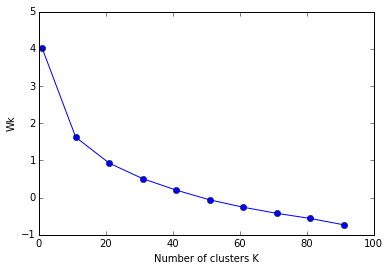

In [170]:
plt.xlabel('Number of clusters K')
plt.ylabel('Wk') # Elbow method
plt.plot(ks1, logWkbs1, marker='o')

### The gap statistic 

But as Wikipedia promptly explains, this “elbow” cannot always be unambiguously identified. In this post we will show a more sophisticated method that provides a statistical procedure to formalize the “elbow” heuristic. The gap statistic was developed by Stanford researchers Tibshirani, Walther and Hastie in their 2001 paper. The idea behind their approach was to find a way to standardize the comparison of \log W_k with a null reference distribution of the data, i.e. a distribution with no obvious clustering. 

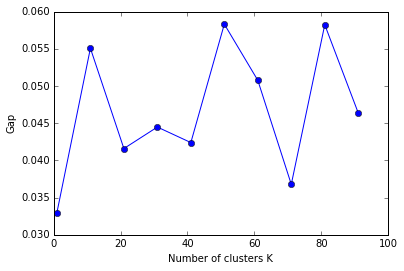

In [202]:
plt.xlabel('Number of clusters K')
plt.ylabel('Gap')
plt.plot(ks1, sk1, marker='o')  # not really decisive?

### Topic range=(20,50) step=3

In [123]:
# Let's zoom in to the interval 20-50
ks2, logWks2, logWkbs2, sk2 = gap_statistic(pos, ks_min=20, ks_max=50, ks_step=3) # computationally intensive

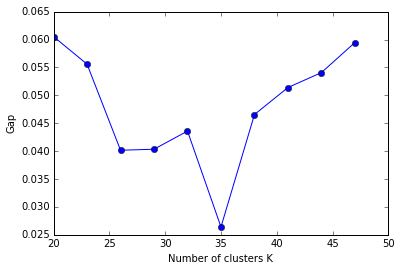

In [171]:
plt.xlabel('Number of clusters K')
plt.ylabel('Gap')
plt.plot(ks, sk, marker='o') # huh?

### Topic range=(10,50) step=2

In [172]:
# an extensive realistic run
ks3, logWks3, logWkbs3, sk3 = gap_statistic(pos, ks_min=10, ks_max=50, ks_step=2) # computationally intensive

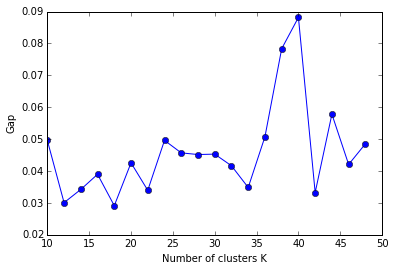

In [174]:
plt.xlabel('Number of clusters K')
plt.ylabel('Gap')
plt.plot(ks3, sk3, marker='o') # alright, 40 as an optimal number of topics?

### FINAL: Topic range=(10,70) step=1

In [214]:
ks_final, logWks_final, logWkbs_final, sk_final = gap_statistic(pos, ks_min=10, ks_max=70, ks_step=1)
# !! computationally intensive

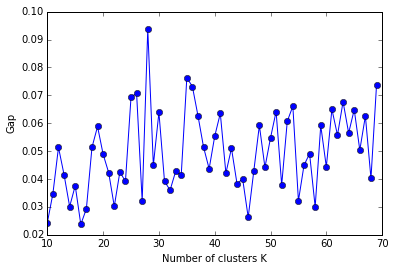

In [216]:
plt.xlabel('Number of clusters K')
plt.ylabel('Gap')
plt.plot(ks_final, sk_final, marker='o') 

In [294]:
# what is the optimal number of topics? (maximum here)
m = max(sk_final)
maximums = [i for i, j in enumerate(sk_final) if j == m]
optimal_n_clusters = ks_final[maximums[0]] 
optimal_n_clusters

28

Seems like the optimal number of topics is **28**

In [295]:
k_fit = KMeans(n_clusters=optimal_n_clusters).fit_predict(cos_distance)

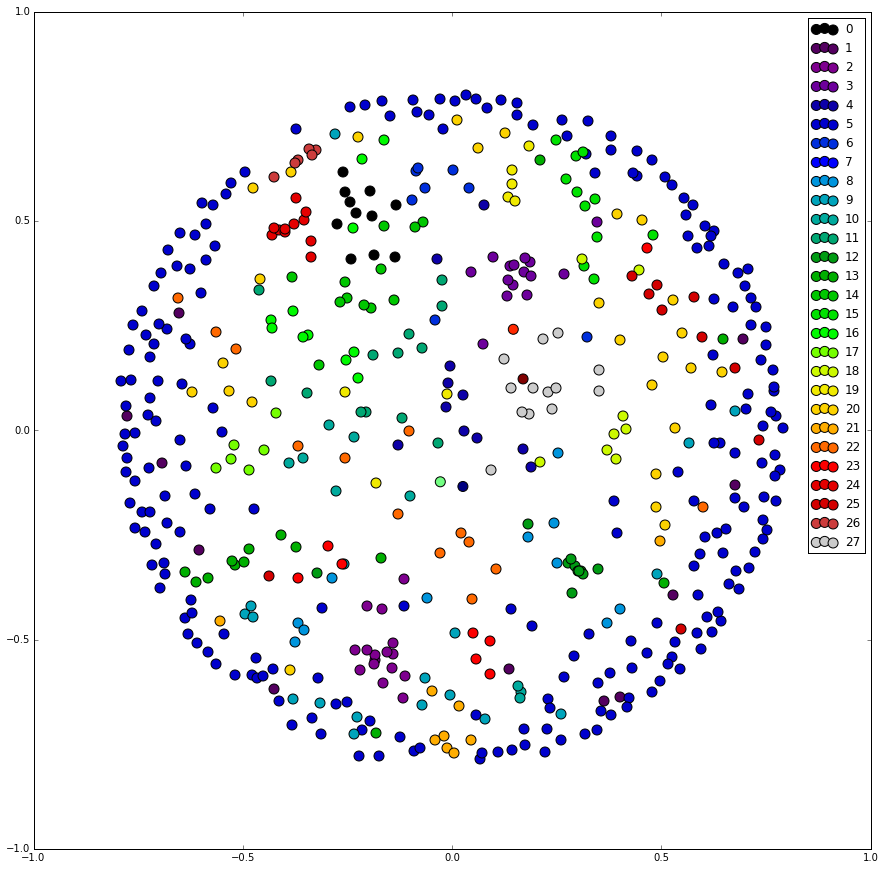

In [296]:
figure(figsize=(15,15))

x = np.arange(10)
yys = [i+x+(i*x)**2 for i in range(optimal_n_clusters)]
colors = cm.nipy_spectral(np.linspace(0, 1, optimal_n_clusters))
labels = ['cluster{0}'.format(i) for i in range(optimal_n_clusters)]
for idx in range(0,optimal_n_clusters):
    plt.scatter(xs[numpy.where(k_fit==idx)], ys[numpy.where(k_fit==idx)], s=100, label=str(idx), c=colors[idx])
#     plt.annotate('cluster{0}'.format(idx), (xs[numpy.where(k_fit==idx)], ys[numpy.where(k_fit==idx)]))
plt.legend()
#print xs[numpy.where(k_fit==0)]
#colorbar()

## Show the topics of a selected cluster from the clusters above

In [300]:
cluster_number = 23 # select cluster number to plot topics within it
cluster_indices = [ numpy.where(k_fit==n) for n in range(0,optimal_n_clusters) ]
[n for n in cluster_indices[cluster_number][0]]
print cluster_indices[cluster_number][0]
topic_out = [topics[n] for n in cluster_indices[cluster_number][0]]
print numpy.shape(topic_out)

[ 61  93 205 219 290 369 415 454]
(8, 175884)


In [301]:
topic_weights = [ return_n_words(dic, topic_out[idx], 10) for idx in range(0,len(topic_out[:])) ]

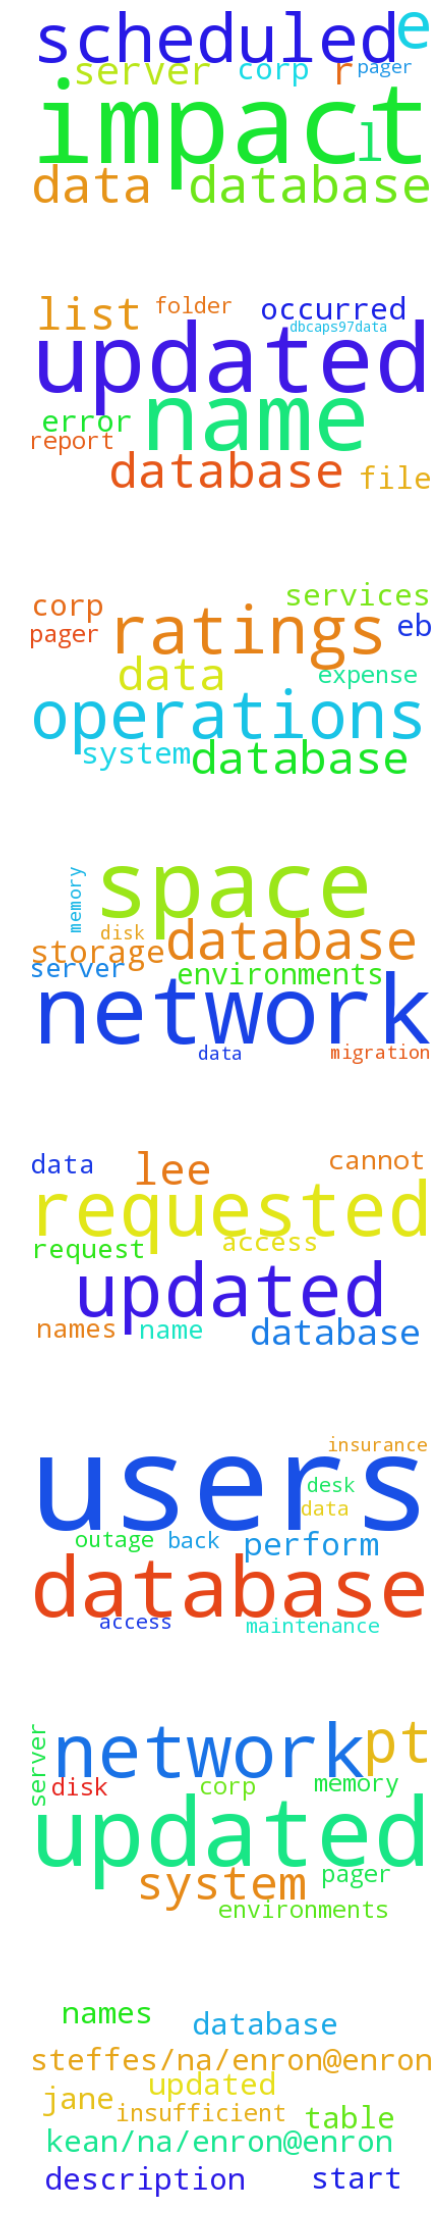

In [302]:
from wordcloud import WordCloud

figure(figsize=(16,40))
for idx,topic in enumerate(topic_weights):
    wc = WordCloud(background_color="white")
    ww = [(word,weight) for word,weight in topic.iteritems()]
    img = wc.generate_from_frequencies(ww)
    subplot(len(topic_weights),2,2*idx+1)
    imshow(img)
    axis('off')
    
#    subplot(nTopics,2,2*idx+2)
#    plot(topicsByAge[:,idx])
#    axis([10, 100, 0, 1.0])
#    title('Topic #%2d'%(idx))

In [246]:
# TODO try TSNE method for data embedding, compare results